# Data analysis

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nltk.corpus import words
from collections import Counter
from tqdm import tqdm

In [2]:
songs = pd.read_json('data/songs_with_emotion.json.bz2')
print(songs.shape)
songs.head()

(29617, 10)


,name,author,link,lyrics,chords,genre,actual_name,language,clean_lyrics,emotion
0,As Long As The Grass Shall Grow,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"As long, As the moon shall rise, As ...","['A', 'E', 'A', 'A', 'E', 'A', 'D', 'D', 'A', ...",Country,As Long As The Grass Shall Grow,en,"As long, As the moon shall rise, As ...","[joy, neutral, anger]"
1,Delias Gone (ver 4),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"Delia, oh, Delia Delia all my life\r\nIf I had...","['A', 'D', 'A', 'A7', 'D', 'B7', 'E', 'A', 'D'...",Country,Delias Gone,en,"Delia, oh, Delia Delia all my life If I hadn't...","[anger, fear, sad]"
2,Mean Eyed Cat,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I gave my woman half my money at the general s...,"['E', 'B7', 'E', 'A7', 'B7', 'E', 'E', 'B7', '...",Country,Mean Eyed Cat,en,I gave my woman half my money at the general s...,"[sad, fear, anger]"
3,I Couldnt Keep From Crying,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"I SAW YOU WALKING BY HIS SIDE,\r\nHEARD YOU W...","['A', 'A7', 'D', 'A', 'E7', 'A', 'A7', 'D', 'A...",Country,I Couldnt Keep From Crying,en,"I SAW YOU WALKING BY HIS SIDE, HEARD YOU WHIS...","[sad, calm, joy]"
4,It Aint Me Babe (ver 3),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Go 'way from my window leave at your own chose...,"['A', 'Bm', 'A', 'E', 'A', 'A', 'Bm', 'A', 'E'...",Country,It Aint Me Babe,en,Go 'way from my window leave at your own chose...,"[neutral, anger, fear]"


## Sentiment analysis

In [13]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...


True

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer() # initialize the Vader sentiment analyzer

tqdm.pandas()

def get_sentiment(compound, threshold=0.3):
    """Compound is a value between -1 and 1."""
    if compound > threshold:
        return 'positive'
    elif compound < -threshold:
        return 'negative'
    elif -threshold < compound < threshold:
        return 'neutral'
    raise ValueError

songs['sentiment'] = songs['clean_lyrics'].progress_apply(lambda lyrics: analyzer.polarity_scores(lyrics))
songs['sentiment_name'] = songs['sentiment'].apply(lambda sentiment: get_sentiment(sentiment['compound']))

songs.to_json('data/songs_with_sentiment.json.bz2', compression='bz2')

100%|██████████| 29617/29617 [01:33<00:00, 315.82it/s]


In [31]:
print(songs.sentiment_name.value_counts())
songs.head()

positive    20379
negative     7558
neutral      1680
Name: sentiment_name, dtype: int64


,name,author,link,lyrics,chords,genre,actual_name,language,clean_lyrics,emotion,sentiment,sentiment_name
0,As Long As The Grass Shall Grow,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"As long, As the moon shall rise, As ...","['A', 'E', 'A', 'A', 'E', 'A', 'D', 'D', 'A', ...",Country,As Long As The Grass Shall Grow,en,"As long, As the moon shall rise, As ...","[joy, neutral, anger]","{'neg': 0.072, 'neu': 0.844, 'pos': 0.084, 'co...",positive
1,Delias Gone (ver 4),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"Delia, oh, Delia Delia all my life\r\nIf I had...","['A', 'D', 'A', 'A7', 'D', 'B7', 'E', 'A', 'D'...",Country,Delias Gone,en,"Delia, oh, Delia Delia all my life If I hadn't...","[anger, fear, sad]","{'neg': 0.094, 'neu': 0.872, 'pos': 0.035, 'co...",negative
2,Mean Eyed Cat,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I gave my woman half my money at the general s...,"['E', 'B7', 'E', 'A7', 'B7', 'E', 'E', 'B7', '...",Country,Mean Eyed Cat,en,I gave my woman half my money at the general s...,"[sad, fear, anger]","{'neg': 0.028, 'neu': 0.928, 'pos': 0.044, 'co...",positive
3,I Couldnt Keep From Crying,Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,"I SAW YOU WALKING BY HIS SIDE,\r\nHEARD YOU W...","['A', 'A7', 'D', 'A', 'E7', 'A', 'A7', 'D', 'A...",Country,I Couldnt Keep From Crying,en,"I SAW YOU WALKING BY HIS SIDE, HEARD YOU WHIS...","[sad, calm, joy]","{'neg': 0.077, 'neu': 0.683, 'pos': 0.24, 'com...",positive
4,It Aint Me Babe (ver 3),Johnny Cash,https://tabs.ultimate-guitar.com/tab/johnny-ca...,Go 'way from my window leave at your own chose...,"['A', 'Bm', 'A', 'E', 'A', 'A', 'Bm', 'A', 'E'...",Country,It Aint Me Babe,en,Go 'way from my window leave at your own chose...,"[neutral, anger, fear]","{'neg': 0.123, 'neu': 0.728, 'pos': 0.148, 'co...",neutral


In [27]:
songs.sentiment_name.value_counts()

positive    20404
negative     7548
neutral      1665
Name: sentiment_name, dtype: int64

In [24]:
songs.sentiment[5]

{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.7739}

#### Genres

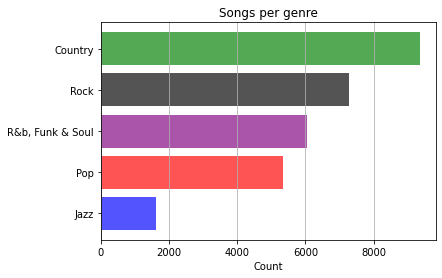

In [3]:
songs['genre'].value_counts().values

plt.barh(songs['genre'].value_counts().keys()[::-1], songs['genre'].value_counts().values[::-1], color=['blue', 'red', 'purple', 'black', 'green'], alpha=0.67)
plt.grid(axis='x')
plt.title('Songs per genre')
plt.xlabel('Count')
plt.rcParams['font.size'] = '13'

#### Tokenization + lemmatization
Do word counts for the lyrics of all songs through the different genres.

#### Compare number of words per genre
Uses nltk for tokenization + lemmatization: https://medium.com/mlearning-ai/nlp-tokenization-stemming-lemmatization-and-part-of-speech-tagging-9088ac068768


In [4]:
import spacy
from tokenizer import tokenizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load('en_core_web_sm')
# nlp.remove_pipe('tagger')
# nlp.remove_pipe('parser')
nlp.remove_pipe('ner')
nlp.remove_pipe('senter')

stop_words = spacy.lang.en.stop_words.STOP_WORDS

ModuleNotFoundError: No module named 'tokenizer'

In [5]:
lyrics_per_genre = {}
for genre in songs.genre.value_counts().keys():
    lyrics_per_genre[genre] = ' '.join(songs[songs.genre == genre]['lyrics']).lower().replace('-', '')

In [ ]:
def wordcloud_most_common_words(lyrics):
    font_path = 'Roboto/Roboto-Black.ttf'
    # lower max_font_size
    wordcloud = WordCloud(font_path=font_path, width=6000, height=3000, background_color="black", colormap='Set1').generate(lyrics)
    wordcloud.recolor(colormap='gist_rainbow', random_state=1)
    #black: gist_rainbow
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
len(lyrics_per_genre['Country'])

10105551

In [8]:
class Genre:
    def __init__(self, name):
        
        corpus = set(words.words())
        nlp.max_length = 11_000_000

        self.name = name
        print(f'\n---> Creating spacy document for genre: {name}.')
        self.doc = nlp(lyrics_per_genre[name][0:200_000])
        print(f'Getting NOUN, VERB, and PRONOUN frequencies.')
        self.nouns = [token.lemma_ for token in self.doc if token.pos_ == 'NOUN' and token.is_stop == False and token.is_punct == False and token.text in corpus]
        self.verbs = [token.lemma_ for token in self.doc if token.pos_ == 'VERB' and token.is_stop == False and token.is_punct == False and token.text in corpus]
        self.pronouns = [token.lemma_ for token in self.doc if token.pos_ == 'PRON' and token.is_stop == False and token.is_punct == False and token.text in corpus]
        self.nouns_freq = Counter(self.nouns)
        self.verbs_freq = Counter(self.verbs)
        self.pronouns_freq = Counter(self.pronouns)

        nr = 7

        print(f'NOUNS: {self.nouns_freq.most_common(nr)}')
        print(f'VERBS: {self.verbs_freq.most_common(nr)}')
        print(f'PRONOUNS: {self.pronouns_freq.most_common(nr)}')

        self.unique_nouns = self.get_unique_nouns()
        print(f'Number of unique nouns: {len(self.unique_nouns)}.')

        a = Counter(sum([emotion for emotion in songs.loc[songs['genre'] == name]['emotion']], []))

        self.primary_emotions = {k: v / total for total in (sum(a.values()),) for k, v in a.items()}
        self.primary_emotions['genre'] = name

    
    def get_unique_nouns(self):
        corpus = set(words.words())
        filtered_set = set()
        for word in np.unique(self.nouns):
            if word in corpus:
                filtered_set.add(word)
        return filtered_set
        

In [ ]:
# from transformers import pipeline
# from timeit import default_timer as timer
# from tqdm import tqdm

# tqdm.pandas()

# task = 'zero-shot-classification'
# model = 'typeform/distilbert-base-uncased-mnli' # see there: https://huggingface.co/typeform/distilbert-base-uncased-mnli
# classifier = pipeline(task, model)
# labels = ['joy', 'sad', 'anger', 'fear', 'neutral', 'calm'] # Emotions taken from the Russel model of emotions
# m = len(labels)
# songs['emotion'] = songs['clean_lyrics'].progress_map(lambda lyrics: classifier(lyrics, labels)['labels'][0:3])

Study of primary emotions through genres

In [5]:
jazz = Genre('Jazz')
pop = Genre('Pop')
rb_funk_soul = Genre('R&b, Funk & Soul')
rock = Genre('Rock')
country = Genre('Country')

NameError: name 'Genre' is not defined

In [8]:
print(len(rock.unique_nouns))
print(len(jazz.unique_nouns))
print(len(rb_funk_soul.unique_nouns))
print(len(pop.unique_nouns))
print(len(country.unique_nouns))

918
968
758
835
1074


In [91]:
# fig, axs = plt.subplots(1, 5, figsize=(18, 6))
# axs[0].pie(jazz.primary_emotions.values(), labels = jazz.primary_emotions.keys())
# axs[0].set_title('Jazz')
# axs[1].pie(rock.primary_emotions.values(), labels = rock.primary_emotions.keys())
# axs[1].set_title('Rock')
# axs[2].pie(rb_funk_soul.primary_emotions.values(), labels = rb_funk_soul.primary_emotions.keys())
# axs[2].set_title('R&b, funk & soul')
# axs[3].pie(country.primary_emotions.values(), labels = country.primary_emotions.keys())
# axs[3].set_title('Country')
# axs[4].pie(pop.primary_emotions.values(), labels = pop.primary_emotions.keys())
# axs[4].set_title('Pop')

# print(dict(jazz.primary_emotions))
# print(dict(rock.primary_emotions))
# print(dict(rb_funk_soul.primary_emotions))
# print(dict(country.primary_emotions))
# np.array(list(dict(pop.primary_emotions).values())) / np.array(list(dict(pop.primary_emotions).values())).sum()

# a = {k: v / total for total in (sum(pop.primary_emotions.values()),) for k, v in pop.primary_emotions.items()}
# a

print(jazz.primary_emotions)
print(rock.primary_emotions)
print(pop.primary_emotions)

{'neutral': 0.2494824016563147, 'calm': 0.279296066252588, 'sad': 0.15693581780538302, 'joy': 0.14265010351966873, 'fear': 0.09710144927536232, 'anger': 0.07453416149068323}
{'sad': 0.16698770867730692, 'neutral': 0.24656026417171162, 'calm': 0.2552742616033755, 'anger': 0.09759677123463585, 'joy': 0.11020913593835993, 'fear': 0.12337185837461016}
{'calm': 0.26560747663551404, 'joy': 0.12884735202492212, 'sad': 0.1526479750778816, 'neutral': 0.24510903426791278, 'fear': 0.12130841121495327, 'anger': 0.0864797507788162}


In [113]:
emotions_df = pd.DataFrame(jazz.primary_emotions, index=[0])
emotions_df = emotions_df.append(rock.primary_emotions, ignore_index=True)
emotions_df = emotions_df.append(pop.primary_emotions, ignore_index=True)
emotions_df = emotions_df.append(rb_funk_soul.primary_emotions, ignore_index=True)
emotions_df = emotions_df.append(country.primary_emotions, ignore_index=True)
emotions_df

,neutral,calm,sad,joy,fear,anger,genre
0,0.249482,0.279296,0.156936,0.142650,0.097101,0.074534,Jazz
1,0.246560,0.255274,0.166988,0.110209,0.123372,0.097597,Rock
2,0.245109,0.265607,0.152648,0.128847,0.121308,0.086480,Pop
3,0.240121,0.259327,0.156402,0.132781,0.118433,0.092936,"R&b, Funk & Soul"
4,0.258352,0.269833,0.169822,0.120120,0.096873,0.085000,Country


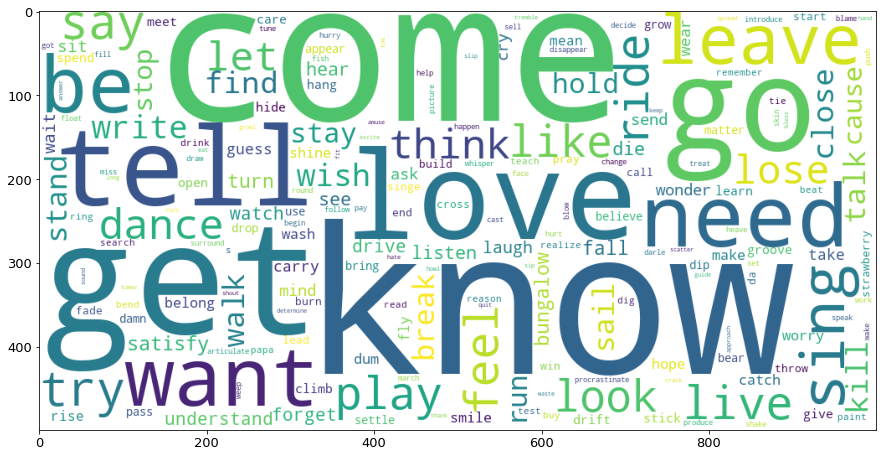

In [68]:
from collections import Counter
word_could_dict=Counter(rock.verbs)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)